In [1]:
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn import model_selection
from sklearn.datasets import make_circles
import plotly.graph_objects as go
from numba import njit

import neal

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    average_precision_score,
    roc_curve,
    precision_recall_curve,
    auc
)

# import Classic_SVM_CVXOPT_Linear as CL
# import Classic_SVM_CVXOPT_Gaussian as CG
import Quantum_SVM_Linear_neal as QL
import Quantum_SVM_Gaussian_neal as QG

In [2]:
#데이터 및 상수 생성

n_train = 50

X, Y = make_circles(n_samples = 200, noise=0.1, random_state = 42)
X_train = X[:n_train, :]
X_test = X[n_train:, :]
y_train = Y[:n_train] 
y_test = Y[n_train:]

y_train = 2 * y_train - 1
y_test = 2 * y_test - 1

N_train = X_train.shape[0]

In [3]:
B_list = [10, 10, 10, 10, 10, 5, 5, 10, 10, 5, 3, 5, 5, 5, 5, 5, 2, 10, 3, 5]
K_list = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2]
xi_list = [5, 1, 1, 0, 5, 5, 1, 1, 5, 5, 1, 1, 1, 5, 5, 0, 5, 1, 5, 1]
gamma_list = [-1, 0.125, -1, -1, 0.125, 0.125, 0.125, 0.25, 0.25, -1, 0.125, 0.25, -1, 0.125, 0.25, -1, 0.125, 0.125, 0.125, 0.125]
C = 1e6

In [4]:
acc_list = []
auroc_list = []
auprc_list = []

acc_Max = []
auroc_Max = []
auprc_Max = []

acc_Mean = []
auroc_Mean = []
auprc_Mean = []

acc_Min = []
auroc_Min = []
auprc_Min = []

for i  in range(len(gamma_list)):
    
    B = B_list[i]
    K = K_list[i]
    xi = xi_list[i]
    gamma = gamma_list[i]

    acc_list = []
    auroc_list = []
    auprc_list = []

    if gamma == -1:

        K_train_train, Q = QL.Q_metric(B, K, xi)

        sol = QL.neal_Solver(Q)
        print(type(sol))

        top_k = len(sol)

        if top_k > 20:
            top_k = 20

        for n_th in range(top_k):

            x_opt, energy = QL.Solution(Q, top_k, n_th)

            alpha = QL.alpha_value(x_opt, B, K)

            acc, auroc, auprc = QL.evaluate_binary_classification(
                y_test,
                QL.Test_evlauation(alpha, K_train_train)
            )

            acc_list.append(acc)
            auroc_list.append(auroc)
            auprc_list.append(auprc)

    elif gamma != -1:

        K_train_train, Q = QG.Q_metric(B, K, xi, gamma)

        sol = QG.neal_Solver(Q)

        top_k = len(sol)
        if top_k > 20:
            top_k = 20

        for n_th in range(top_k):

            x_opt, energy = QG.Solution(sol, top_k, n_th)

            alpha = QG.alpha_value(x_opt, B, K)

            acc, auroc, auprc = QG.evaluate_binary_classification(
                y_test,
                QG.Test_evlauation(alpha, K_train_train, gamma)
            )

            acc_list.append(acc)
            auroc_list.append(auroc)
            auprc_list.append(auprc)

    acc_Max.append(max(acc_list))
    auroc_Max.append(max(auroc_list))
    auprc_Max.append(max(auprc_list))

    acc_Mean.append(np.mean(acc_list))
    auroc_Mean.append(np.mean(auroc_list))
    auprc_Mean.append(np.mean(auprc_list))

    acc_Min.append(min(acc_list))
    auroc_Min.append(min(auroc_list))
    auprc_Min.append(min(auprc_list))

print(f"acc_Max = {acc_Max}, auroc_Max = {auroc_Max}, auprc_Max = {auprc_Max}")

<class 'dimod.sampleset.SampleSet'>


C:\Users\채서병\AppData\Roaming\Python\Python312\site-packages\dwave\samplers\sa\sampler.py:42: SyntaxWarning: invalid escape sequence '\ '
  """Simulated annealing sampler for binary quadratic models.
C:\Users\채서병\AppData\Roaming\Python\Python312\site-packages\dwave\samplers\sa\sampler.py:170: SyntaxWarning: invalid escape sequence '\ '
  """Sample from a binary quadratic model.


KeyboardInterrupt: 

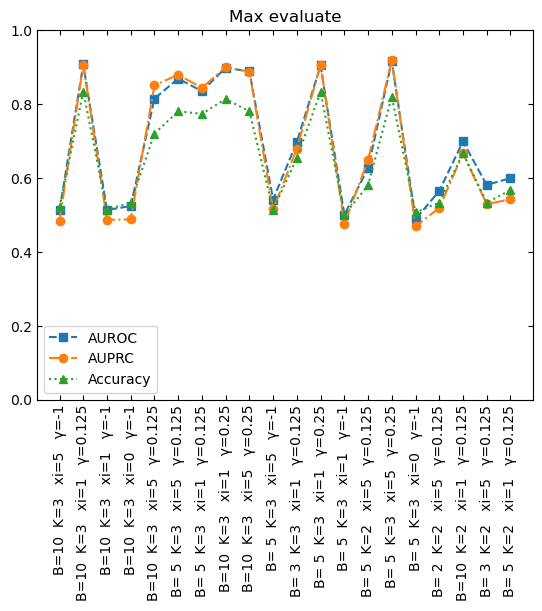

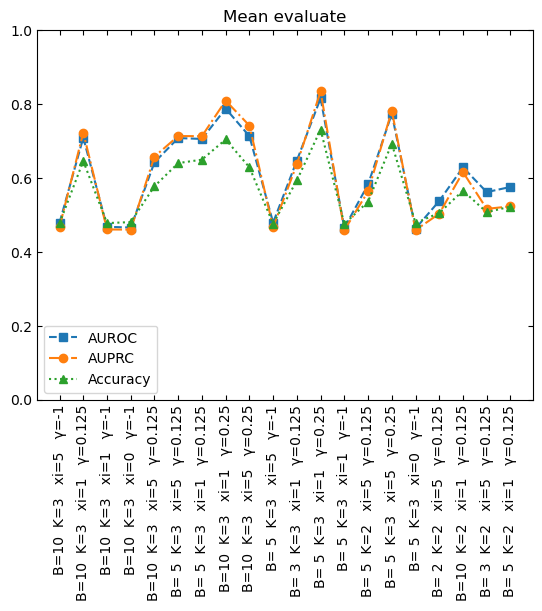

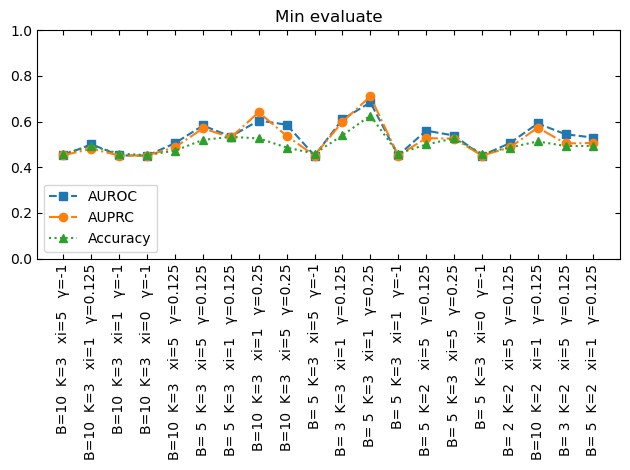

In [ ]:
x_labels = []

for B, K, xi, gamma in zip(B_list, K_list, xi_list, gamma_list):
    label = f"B={B:>2}  K={K:<2}  xi={xi:<2}  γ={gamma}"
    x_labels.append(label)

x = np.arange(len(x_labels))

plt.figure()
plt.plot(x, auroc_Max, 's--', label="AUROC")
plt.plot(x, auprc_Max, 'o-.', label="AUPRC")
plt.plot(x, acc_Max, '^:', label="Accuracy")
plt.title("Max evaluate")
plt.xticks(x, x_labels, rotation=90)
plt.tick_params(axis = 'both', which='both', direction = "in", top = True, right = True)
plt.ylim(0, 1)
plt.legend(loc = "lower left")

plt.figure()
plt.plot(x, auroc_Mean, 's--', label="AUROC")
plt.plot(x, auprc_Mean, 'o-.', label="AUPRC")
plt.plot(x, acc_Mean, '^:', label="Accuracy")
plt.title("Mean evaluate")
plt.xticks(x, x_labels, rotation=90)
plt.tick_params(axis = 'both', which='both', direction = "in", top = True, right = True)
plt.ylim(0, 1)
plt.legend(loc = "lower left")

plt.figure()
plt.plot(x, auroc_Min, 's--', label="AUROC")
plt.plot(x, auprc_Min, 'o-.', label="AUPRC")
plt.plot(x, acc_Min, '^:', label="Accuracy")
plt.title("Min evaluate")
plt.xticks(x, x_labels, rotation=90)
plt.tick_params(axis = 'both', which='both', direction = "in", top = True, right = True)
plt.ylim(0, 1)
plt.legend(loc = "lower left")

plt.tight_layout()

plt.show()